<a href="https://colab.research.google.com/github/aditishankar0630/ml_mini_projects/blob/main/trialminiprojectsml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn


In [9]:
 import sklearn
 from sklearn.datasets import load_breast_cancer
 data = load_breast_cancer()

In [10]:
# Organize our data
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [11]:
print(label_names)
print(feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [12]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features, labels, test_size = 0.33, random_state = 42)

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels)

In [14]:
predictions = gnb.predict(test)
print(predictions)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1]


In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels, predictions))

0.9414893617021277


In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [3]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
data = pd.read_csv("creditcard.csv")

In [7]:

# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())

(81299, 31)
               Time            V1            V2            V3            V4  \
count  81299.000000  81299.000000  81299.000000  81299.000000  81299.000000   
mean   37671.743256     -0.259996     -0.038228      0.678460      0.163041   
std    15321.247892      1.887739      1.677855      1.382087      1.367118   
min        0.000000    -56.407510    -72.715728    -33.680984     -5.172595   
25%    30955.500000     -1.021634     -0.601906      0.185895     -0.726028   
50%    40336.000000     -0.252322      0.068932      0.764270      0.182495   
75%    49589.000000      1.153522      0.720881      1.393621      1.043485   
max    58874.000000      1.960497     18.902453      4.226108     16.715537   

                 V5            V6            V7            V8            V9  \
count  81299.000000  81298.000000  81298.000000  81298.000000  81298.000000   
mean      -0.277528      0.095578     -0.114114      0.053131     -0.012674   
std        1.382636      1.305288      

In [8]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0024414303329223183
Fraud Cases: 198
Valid Transactions: 81100


In [11]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,198.000000
mean,93.992778
std,211.099415
min,0.000000
25%,1.000000
50%,6.410000
75%,99.990000
max,1809.680000


In [13]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,81100.000000
mean,98.107837
std,269.738371
min,0.000000
25%,7.730000
50%,26.990000
75%,89.530000
max,19656.530000


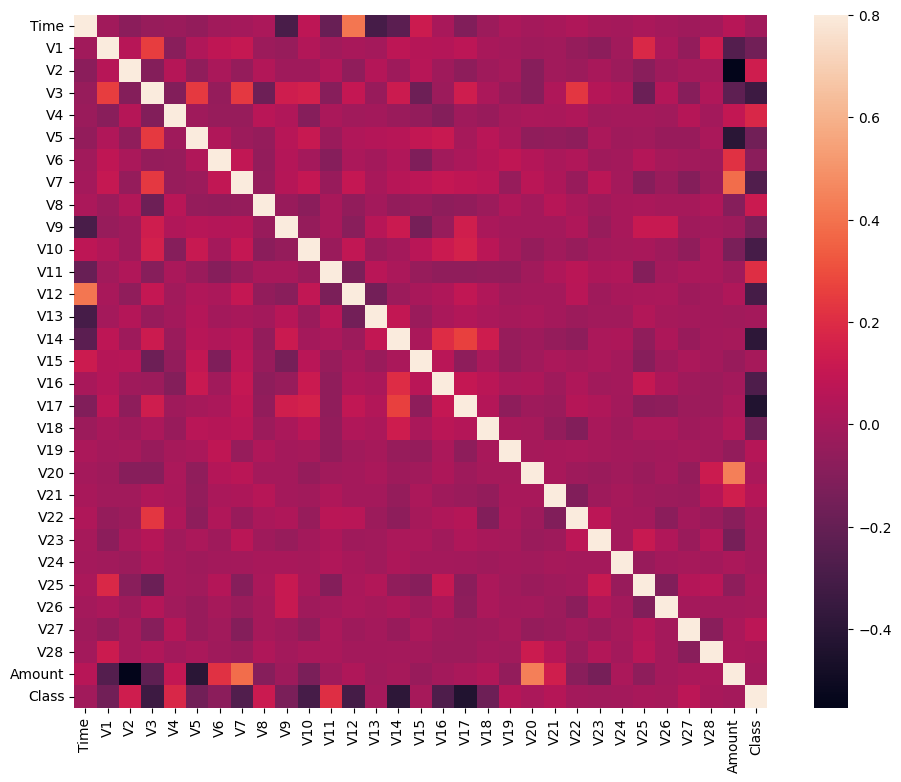

In [14]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [15]:
X = data.drop(['Class'], axis = 1)
Y= data["Class"]
print(X.shape)
print(Y.shape)
xValues = X.values
yValues = Y.values

(81299, 30)
(81299,)


In [27]:
print("Missing values in yValues before split:", np.isnan(yValues).sum())
nan_mask=np.isnan(yValues)
xValues=xValues[~nan_mask]
yValues=yValues[~nan_mask]

Missing values in yValues before split: 0


In [28]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(xValues, yValues, test_size = 0.2, random_state = 42)

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(xtrain, ytrain)
y_pred = rfc.predict(xtest)

In [32]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_outliers = len(fraud)
n_errors = (y_pred != ytest).sum()
print("The model used is Random Forest classifier")
acc = accuracy_score(ytest, y_pred)
print("The accuracy is {}".format(acc))
prec = precision_score(ytest, y_pred)
print("The precision is {}".format(prec))

rec = recall_score(ytest, y_pred)
print("The recall is {}".format(rec))

f1 = f1_score(ytest, y_pred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(ytest, y_pred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9993849938499385
The precision is 0.9285714285714286
The recall is 0.7647058823529411
The F1-Score is 0.8387096774193549
The Matthews correlation coefficient is0.8423732851549092
